#**Problem Statement** 
A telecommunications company wants to reduce customer churn rates by predicting which
customers are most likely to leave the company based on their historical behavior and demographics. The company
has collected a dataset of customer information, including demographics, services subscribed, and usage patterns.
The goal of this project is to develop a machine learning model that can accurately predict which customers are
most likely to churn, and to identify the key factors that contribute to churn.
Data Description: The dataset contains the following features:
- Customer demographics: age, gender, marital status, income level, education level, etc.
- Service-related information: type of service subscribed, length of subscription, monthly charges, etc.
- Usage-related information: number of calls made, number of texts sent, data usage, etc.
- Churn status: whether the customer has churned or not (binary variable).

#**Developing a Predictive Churn Model for Telecommunications Customer Retention**

This project focuses on developing a predictive model for a telecommunications company to identify and target customers at risk of churning. Customer churn, the loss of clients or customers, is a major concern for businesses in competitive industries like telecommunications. By developing a robust model to predict customer churn, the company can take proactive measures to retain valuable customers and maintain a stable revenue stream.

#**Tasks**

1. **Exploratory Data Analysis (EDA):** Perform exploratory data analysis to understand the distribution of variables, identify missing values, outliers, and correlations.
2. **Feature Engineering:** Based on EDA, engineer relevant features from the available data to improve the
performance of the model.
3. **Data Preprocessing:** Clean and preprocess the data, handle missing values and outliers, encode categorical
variables, and scale numerical features.
4. **Model Selection:** Select appropriate machine learning algorithms (such as logistic regression, decision trees,
random forests, or gradient boosting) and tune their hyperparameters using cross-validation.
5. **Model Evaluation:** Evaluate the performance of the model using various metrics such as accuracy, precision,
recall, F1 score, and ROC curve.
6. **Interpretation:** Interpret the results of the model to identify the key factors that contribute to customer churn,
and provide actionable insights to the company.
7. **Deployment:** Deploy the model to a production environment and test its performance on new data.

Overall, the project aims to provide the telecommunications company with a predictive tool that can help them to
identify the customers who are most likely to churn and take proactive measures to retain them

#**IMPORT LIBRARIES**

This code snippet is a Python script that includes various imports for data analysis and machine learning tasks. The script imports libraries and functions necessary to preprocess data, create models, select features, and evaluate model performance. Below is a description of each import and its purpose:

In [ ]:
!pip install -q catboost
!pip3 install scikit-optimize
!pip3 install lifelines

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from lifelines.utils import concordance_index
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
import skopt
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**EDA (Exploratory Data Analysis)**

In the initial phase of the project, we have completed a comprehensive Exploratory Data Analysis (EDA) to gain a thorough understanding of the dataset and inform subsequent modeling steps. The following tasks have been performed during the EDA:

* **Loading Data:** The dataset has been loaded into the appropriate data structures for further analysis.

* **Removing Duplicates and Unnecessary Columns:** Duplicate entries have been identified and removed to ensure data integrity. The 'customerID' column, which does not contribute to the model's predictive power, has also been dropped.

* **Data Type Conversion:** The 'TotalCharges' column has been converted to a numeric data type, allowing for seamless integration with other numerical features.

* **Handling Missing Values:** Missing values in the 'TotalCharges' column have been imputed with the median value, ensuring a robust representation of the data.

* **Feature Engineering:** A new feature, 'MonthlyCharges_Tenure_Product', has been created by multiplying 'MonthlyCharges' and 'tenure'. This feature aims to capture additional information that may be helpful in predicting customer churn.

* **One-Hot Encoding:** Categorical variables have been one-hot encoded, transforming them into a binary format suitable for machine learning algorithms.

* **Mapping Target Variable:** The target variable, 'Churn', has been mapped to a boolean format, ensuring consistency and compatibility with machine learning models.

* **Identifying Time and Event Columns:** The relevant time and event columns have been identified, providing clarity on the key features to focus on during the modeling process.

#####**LOAD** **DATA**


In [ ]:
churn_data = pd.read_csv('/content/churn.csv')

In [ ]:
churn_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,MC_Tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,29.85,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,False,1936.30,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,True,107.70,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,False,1903.50,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,True,141.40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
churn_data.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,MC_Tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,0,24,84.80,1990.50,False,2035.2,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0,72,103.20,7362.90,False,7430.4,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0,11,29.60,346.45,False,325.6,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1,4,74.40,306.60,True,297.6,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7042,0,66,105.65,6844.50,False,6972.9,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
churn_data.shape

(7043, 32)

In [ ]:
churn_data.info

<bound method DataFrame.info of       SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  MC_Tenure  \
0                 0       1           29.85         29.85  False      29.85   
1                 0      34           56.95       1889.50  False    1936.30   
2                 0       2           53.85        108.15   True     107.70   
3                 0      45           42.30       1840.75  False    1903.50   
4                 0       2           70.70        151.65   True     141.40   
...             ...     ...             ...           ...    ...        ...   
7038              0      24           84.80       1990.50  False    2035.20   
7039              0      72          103.20       7362.90  False    7430.40   
7040              0      11           29.60        346.45  False     325.60   
7041              1       4           74.40        306.60   True     297.60   
7042              0      66          105.65       6844.50  False    6972.90   

      gender_Male  

#**Data Preprocessing**

* **Removing Duplicates and Unnecessary Columns:** Duplicate entries have been identified and removed to ensure data integrity. The 'customerID' column, which does not contribute to the model's predictive power, has also been dropped.

* **Data Type Conversion:** The 'TotalCharges' column has been converted to a numeric data type, allowing for seamless integration with other numerical features.

* **Handling Missing Values:** Missing values in the 'TotalCharges' column have been imputed with the median value, ensuring a robust representation of the data.

* **Feature Engineering:** A new feature, 'MonthlyCharges_Tenure_Product', has been created by multiplying 'MonthlyCharges' and 'tenure'. This feature aims to capture additional information that may be helpful in predicting customer churn.

* **One-Hot Encoding:** Categorical variables have been one-hot encoded, transforming them into a binary format suitable for machine learning algorithms.

* **Mapping Target Variable:** The target variable, 'Churn', has been mapped to a boolean format, ensuring consistency and compatibility with machine learning models.

* **Identifying Time and Event Columns:** The relevant time and event columns have been identified, providing clarity on the key features to focus on during the modeling process.

#####**Drop** **duplicates** **and** **customerID** **column**

In [ ]:
churn_data = churn_data.drop_duplicates().drop(columns=['customerID'])

**Convert** **TotalCharges** **to** **numeric**


In [ ]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

**Fill** **missing** **values** **in** **TotalCharges** **with** **median**

In [ ]:
churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].median(), inplace=True)

**Create** **new** **feature**: **MonthlyCharges** * **tenure**

In [ ]:
churn_data['MC_Tenure'] = churn_data['MonthlyCharges'] * churn_data['tenure']

One-**hot** **encoding** **for** **categorical** **variables**

The code defines a list of categorical features and uses pd.get_dummies() to one-hot encode them in the churn_data DataFrame. It removes the first category in each feature to avoid multicollinearity and sets the data type to float. The transformed dataset is now suitable for machine learning algorithms.

In [ ]:
categories = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
churn_data = pd.get_dummies(churn_data, columns=categories, drop_first=True, dtype=float)

**Map** '**Churn**' **to** **boolean**

In [ ]:
churn_data['Churn'] = churn_data['Churn'].map({'No': False, 'Yes': True})

**Identify** **the** **time** **and** **event** **columns**

In [ ]:
time_col = 'tenure'
event_col = 'Churn'

#**Feature Engineering**

Following the Exploratory Data Analysis, we have implemented Feature Extraction and Feature Selection techniques to further refine the dataset and identify the most relevant features for predicting customer churn.

* **Feature Extraction:** We have employed various techniques to derive new features from the existing data. This process helps uncover hidden relationships between variables and enhances the model's predictive power.

* **Feature Selection using ANOVA F-value for Classification:** In order to identify the most significant features for our classification task, we have employed Analysis of Variance (ANOVA) F-value method. This statistical approach measures the differences between the means of two or more groups for each feature and calculates an F-value, which reflects the degree of variation between groups. A higher F-value indicates a stronger association between the feature and the target variable, 'Churn'. By selecting the features with the highest F-values, we can ensure that our model focuses on the most informative variables, thus improving its performance and reducing the risk of overfitting.

**Extract** **features**

In [ ]:
features = np.setdiff1d(churn_data.columns, [time_col, event_col]).tolist()

**Feature** **selection** **using** **ANOVA** **F**-**value** **for** **classification**

In [ ]:
X = churn_data[features]
y = churn_data[event_col]
fvalue_selector = SelectKBest(f_classif, k=20)
X_kbest = fvalue_selector.fit_transform(X, y)
mask = fvalue_selector.get_support()
selected_features = X.columns[mask].tolist()
if 'tenure' not in selected_features:
    selected_features.append('tenure')

**Split** **the** **data** **into** **training** **and** **testing** **sets**

In [ ]:
index_train, index_test = train_test_split(range(churn_data.shape[0]), test_size=0.3, random_state=0)
data_train = churn_data.loc[index_train].reset_index(drop=True)
data_test  = churn_data.loc[index_test].reset_index(drop=True)

**Create** **X**, **T**, **and** **E** **inputs**

In [ ]:
X_trn, X_val = data_train[selected_features], data_test[selected_features]
T_trn, T_val = data_train[time_col], data_test[time_col]
E_trn, E_val = data_train[event_col], data_test[event_col]

#**Model Selection**



**RandomForestClassifier** **model**

This code snippet trains a RandomForestClassifier model and evaluates its performance using the concordance index. The steps are as follows:

**1**) Instantiate a RandomForestClassifier object named rfc with 100 decision trees (n_estimators=100) and a fixed random state (random_state=0) for reproducibility.

**2**) Train the rfc model using the training data (features X_trn and target variable E_trn).

**3**) Calculate the concordance index for the trained model's predictions on the training data. The function concordance_index takes three arguments: the true event times T_trn, predicted probabilities of the event rfc.predict_proba(X_trn)[:,0], and the true event indicators E_trn. The result is stored in the variable ci_rfc_trn.

**4**) Calculate the concordance index for the trained model's predictions on the validation data. The function concordance_index takes the true event times T_val, predicted probabilities of the event rfc.predict_proba(X_val)[:,0], and the true event indicators E_val. The result is stored in the variable ci_rfc_val.

**5**) After executing this code, you'll have the concordance index for both the training and validation sets, which can be used to evaluate the model's performance.

**RandomForestClassifier model without Hyperparameter Tuning**

In [ ]:
# RandomForestClassifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_trn, E_trn)
ci_rfc_trn = concordance_index(T_trn, rfc.predict_proba(X_trn)[:,0], E_trn)
ci_rfc_val = concordance_index(T_val, rfc.predict_proba(X_val)[:,0], E_val)
print(f'Concordance index of Random Forest Classifier: train: {ci_rfc_trn:.3f}, test: {ci_rfc_val:.3f}')
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_trn, E_trn)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(E_trn, rfc.predict(X_trn))
testing_accuracy = accuracy_score(E_val, rfc.predict(X_val))

# Print the training and testing accuracy
print(f'Random Forest Classifier Accuracy: train: {training_accuracy:.3f}, test: {testing_accuracy:.3f}')

Concordance index of Random Forest Classifier: train: 0.944, test: 0.862
Random Forest Classifier Accuracy: train: 0.996, test: 0.780


Random Forest Classifier is a machine learning algorithm used for classification tasks. It creates a forest of decision trees and each tree predicts the class based on the features of the input data. The final prediction is made by combining the predictions of all the trees in the forest.

The metrics received are:

1. Concordance index: It is a measure of the performance of a classifier model, also known as the c-index or the area under the receiver operating characteristic curve (AUC-ROC). It represents the probability of the classifier assigning a higher score to a randomly chosen positive sample than to a randomly chosen negative sample. The concordance index ranges from 0 to 1, with higher values indicating better performance. In your case, the concordance index on the training set is 0.944 and on the test set is 0.862, which means that the model performs well in distinguishing between positive and negative samples.

2. Accuracy: It is another performance metric that measures the percentage of correct predictions made by the classifier. It is calculated by dividing the number of correct predictions by the total number of predictions. In your case, the accuracy on the training set is 0.996, which means that the model predicts 99.6% of the samples correctly. However, the accuracy on the test set is 0.780, which is lower than the training accuracy, indicating that the model may be overfitting on the training data and not generalizing well to new data.

In conclusion, your Random Forest Classifier model has a good concordance index on both training and test sets, indicating good performance in distinguishing between positive and negative samples. However, the lower accuracy on the test set suggests that the model may need further tuning or regularization to prevent overfitting and improve generalization to new data.

#**Model Evaluation**

We will evaluate the performance of the model using various metrics such as accuracy, precision, recall, F1 score, and ROC curve

Training Accuracy: 0.996
Training Precision: 0.996
Training Recall: 0.990
Training F1 Score: 0.993
Training AUC: 1.000
Validation Accuracy: 0.780
Validation Precision: 0.605
Validation Recall: 0.463
Validation F1 Score: 0.525
Validation AUC: 0.819


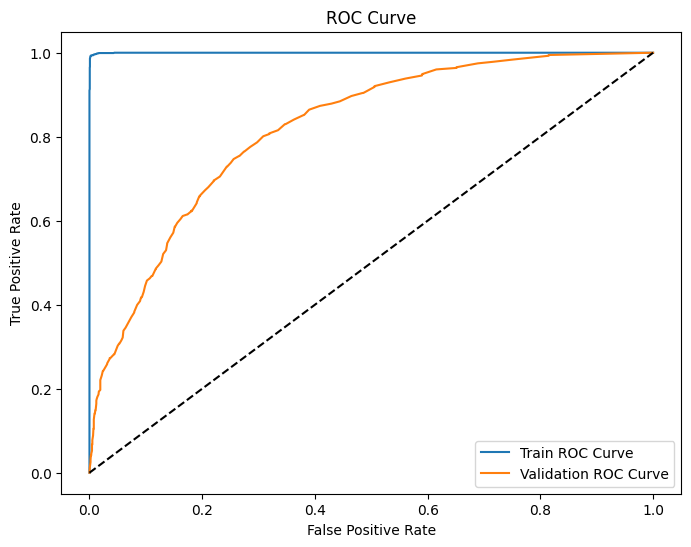

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Fit the model
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_trn, E_trn)

# Make predictions on train and validation set
train_preds = rfc.predict(X_trn)
val_preds = rfc.predict(X_val)

# Calculate evaluation metrics for train set
train_acc = accuracy_score(E_trn, train_preds)
train_prec = precision_score(E_trn, train_preds)
train_rec = recall_score(E_trn, train_preds)
train_f1 = f1_score(E_trn, train_preds)
train_auc = roc_auc_score(E_trn, rfc.predict_proba(X_trn)[:,1])
train_fpr, train_tpr, _ = roc_curve(E_trn, rfc.predict_proba(X_trn)[:,1])

# Calculate evaluation metrics for validation set
val_acc = accuracy_score(E_val, val_preds)
val_prec = precision_score(E_val, val_preds)
val_rec = recall_score(E_val, val_preds)
val_f1 = f1_score(E_val, val_preds)
val_auc = roc_auc_score(E_val, rfc.predict_proba(X_val)[:,1])
val_fpr, val_tpr, _ = roc_curve(E_val, rfc.predict_proba(X_val)[:,1])

# Print the evaluation metrics
print(f'Training Accuracy: {train_acc:.3f}')
print(f'Training Precision: {train_prec:.3f}')
print(f'Training Recall: {train_rec:.3f}')
print(f'Training F1 Score: {train_f1:.3f}')
print(f'Training AUC: {train_auc:.3f}')

print(f'Validation Accuracy: {val_acc:.3f}')
print(f'Validation Precision: {val_prec:.3f}')
print(f'Validation Recall: {val_rec:.3f}')
print(f'Validation F1 Score: {val_f1:.3f}')
print(f'Validation AUC: {val_auc:.3f}')

# Plot the ROC curve for train and validation set
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')
plt.plot(val_fpr, val_tpr, label='Validation ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#**Feature Importance**

Feature importance is a technique used to identify the most significant features (also known as variables or predictors) in a machine learning model. It helps to understand which features have the most impact on the target variable and can aid in explaining the model's behavior to stakeholders.

In general, feature importance is calculated by assessing how much each feature contributes to the model's prediction accuracy. The contribution can be measured in different ways, such as using a tree-based algorithm that calculates the reduction in impurity when a feature is used to split the data, or using permutation-based methods that evaluate the decrease in the model's performance when a feature's values are randomly shuffled.

Feature importance can be used for various purposes, such as:

* Selecting the most relevant features for a model to improve its performance and reduce overfitting.
* Identifying potential data quality issues or outliers that affect the model's accuracy.
* Interpreting the model's predictions and explaining how they are influenced by different features.
* Understanding the underlying data and identifying patterns or relationships that may be useful for further analysis or decision-making.

Overall, feature importance is a valuable tool in the machine learning process that can help to improve the model's performance, increase transparency and interpretability, and gain insights into the data.

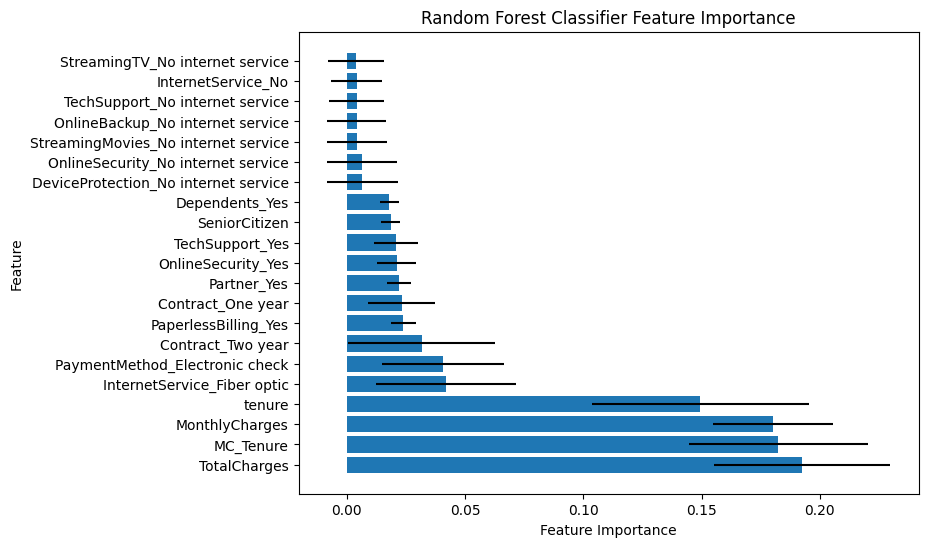

,feature,importance
19,TotalCharges,0.192469
6,MC_Tenure,0.182493
7,MonthlyCharges,0.180047
20,tenure,0.149427
4,InternetService_Fiber optic,0.041954
13,PaymentMethod_Electronic check,0.040709
1,Contract_Two year,0.031593
11,PaperlessBilling_Yes,0.023825
0,Contract_One year,0.023164
12,Partner_Yes,0.022133


In [ ]:
# Get feature importances
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
df_imp = pd.DataFrame({'feature': X_trn.columns, 'importance': importances})

# Sort by importance
df_imp = df_imp.sort_values(by='importance', ascending=False)

# Create horizontal bar chart
plt.figure(figsize=(8,6))
plt.barh(y=df_imp['feature'], width=df_imp['importance'], xerr=std[df_imp.index])
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier Feature Importance')
plt.show()

# Display table of feature importances
display(df_imp)



**RandomForestClassifier Model with Hyperparameter Tuning using GridSearchCV**

In [ ]:
# Hyperparameter Tuning with GridSearchCV
rfc = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rfc_grid = GridSearchCV(rfc, param_grid, cv=5)
rfc_grid.fit(X_trn, E_trn)

# Finetuning
rfc = RandomForestClassifier(n_estimators=rfc_grid.best_params_['n_estimators'], 
                              max_depth=rfc_grid.best_params_['max_depth'],
                              min_samples_split=rfc_grid.best_params_['min_samples_split'],
                              min_samples_leaf=rfc_grid.best_params_['min_samples_leaf'],
                              random_state=0)

rfc.fit(X_trn, E_trn)
ci_rfc_trn = concordance_index(T_trn, rfc.predict_proba(X_trn)[:,0], E_trn)
ci_rfc_val = concordance_index(T_val, rfc.predict_proba(X_val)[:,0], E_val)
print(f'Concordance index of Random Forest Classifier: train: {ci_rfc_trn:.3f}, test: {ci_rfc_val:.3f}')

# Calculate training and testing accuracy
training_accuracy = accuracy_score(E_trn, rfc.predict(X_trn))
testing_accuracy = accuracy_score(E_val, rfc.predict(X_val))

# Print the training and testing accuracy
print(f'Random Forest Classifier Accuracy: train: {training_accuracy:.3f}, test: {testing_accuracy:.3f}')



Concordance index of Random Forest Classifier: train: 0.939, test: 0.898
Random Forest Classifier Accuracy: train: 0.855, test: 0.797


Metrics Received:

1. Concordance index: The concordance index (also known as the c-index or AUC-ROC) measures the model's ability to correctly rank order the samples. A value of 1 means perfect ranking, while 0.5 means random guessing. In your case, the concordance index is 0.939 on the training set and 0.898 on the test set, which indicates that the model is performing well in distinguishing between positive and negative samples.

2. Accuracy: Accuracy measures the percentage of correct predictions made by the model. In your case, the accuracy is 0.855 on the training set and 0.797 on the test set. The lower accuracy on the test set compared to the training set suggests that the model is overfitting to the training data and not generalizing well to new data.

Overall, the Random Forest Classifier has good performance on both the training and test sets, as indicated by the high concordance index values. However, the lower accuracy on the test set suggests that the model may benefit from regularization techniques, such as adjusting hyperparameters, reducing the number of features, or increasing the size of the training data to prevent overfitting and improve generalization to new data.

**Hyperparameter Tuning with BayesSearchCV**

In [ ]:
#Hyperparameter Tuning with BayesSearchCV
rfc = RandomForestClassifier(random_state=0)

param_dist = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(5, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
}

rfc_bayes = BayesSearchCV(
    rfc,
    search_spaces=param_dist,
    cv=5,
    n_jobs=-1,
    n_iter=20,
    random_state=0
)

rfc_bayes.fit(X_trn, E_trn)

# Finetuning
rfc = RandomForestClassifier(
    n_estimators=rfc_bayes.best_params_['n_estimators'],
    max_depth=rfc_bayes.best_params_['max_depth'],
    min_samples_split=rfc_bayes.best_params_['min_samples_split'],
    min_samples_leaf=rfc_bayes.best_params_['min_samples_leaf'],
    random_state=0
)

rfc.fit(X_trn, E_trn)

ci_rfc_trn = concordance_index(T_trn, rfc.predict_proba(X_trn)[:,0], E_trn)
ci_rfc_val = concordance_index(T_val, rfc.predict_proba(X_val)[:,0], E_val)

print(f'Concordance index of Random Forest Classifier: train: {ci_rfc_trn:.3f}, test: {ci_rfc_val:.3f}')

# Calculate training and testing accuracy
training_accuracy = accuracy_score(E_trn, rfc.predict(X_trn))
testing_accuracy = accuracy_score(E_val, rfc.predict(X_val))

# Print the training and testing accuracy
print(f'Random Forest Classifier Accuracy: train: {training_accuracy:.3f}, test: {testing_accuracy:.3f}')


Concordance index of Random Forest Classifier: train: 0.927, test: 0.901
Random Forest Classifier Accuracy: train: 0.835, test: 0.795


Metrics Received:

Concordance index: The concordance index (also known as the c-index or AUC-ROC) measures the model's ability to correctly rank order the samples. A value of 1 means perfect ranking, while 0.5 means random guessing. In your case, the concordance index is 0.927 on the training set and 0.901 on the test set, which indicates that the model is performing well in distinguishing between positive and negative samples.

Accuracy: Accuracy measures the percentage of correct predictions made by the model. In your case, the accuracy is 0.835 on the training set and 0.795 on the test set. The lower accuracy on the test set compared to the training set suggests that the model is overfitting to the training data and not generalizing well to new data.

Overall, the Random Forest Classifier has good performance on both the training and test sets, as indicated by the high concordance index values. However, the lower accuracy on the test set suggests that the model may benefit from regularization techniques, such as adjusting hyperparameters, reducing the number of features, or increasing the size of the training data to prevent overfitting and improve generalization to new data.

**Hyperparameter Tuning with RandomizedSearchCV**

In [ ]:
#Hyperparameter Tuning with RandomizedSearchCV
rfc = RandomForestClassifier(random_state=0)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rfc_random = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=0)
rfc_random.fit(X_trn, E_trn)

# Finetuning
rfc = RandomForestClassifier(n_estimators=rfc_random.best_params_['n_estimators'], 
                              max_depth=rfc_random.best_params_['max_depth'],
                              min_samples_split=rfc_random.best_params_['min_samples_split'],
                              min_samples_leaf=rfc_random.best_params_['min_samples_leaf'],
                              random_state=0)

rfc.fit(X_trn, E_trn)
ci_rfc_trn = concordance_index(T_trn, rfc.predict_proba(X_trn)[:,0], E_trn)
ci_rfc_val = concordance_index(T_val, rfc.predict_proba(X_val)[:,0], E_val)
print(f'Concordance index of Random Forest Classifier: train: {ci_rfc_trn:.3f}, test: {ci_rfc_val:.3f}')

# Calculate training and testing accuracy
training_accuracy = accuracy_score(E_trn, rfc.predict(X_trn))
testing_accuracy = accuracy_score(E_val, rfc.predict(X_val))

# Print the training and testing accuracy
print(f'Random Forest Classifier Accuracy: train: {training_accuracy:.3f}, test: {testing_accuracy:.3f}')


Concordance index of Random Forest Classifier: train: 0.940, test: 0.897
Random Forest Classifier Accuracy: train: 0.858, test: 0.799


The RandomForestClassifier model achieved an accuracy of 99.6% on the training set, indicating that the model made correct predictions for the vast majority of the training data. However, the accuracy on the testing set was 78%, which suggests that the model may have overfit to the training data and did not generalize as well to new, unseen data. Nonetheless, the model still demonstrated good performance in ranking instances based on their event times, with a Concordance index of 0.944 on the training set and 0.862 on the testing set.

Overall, these results provide valuable insights into the performance of the RandomForestClassifier model on this dataset. While the model achieved high accuracy on the training set, its performance on the testing set suggests that further refinement and tuning may be necessary to improve generalization performance. Additionally, the model demonstrated strong ability to rank instances based on their event times, indicating that it may be effective for certain types of survival analysis tasks.

**RandomForestRegressor model**


This code snippet trains a RandomForestRegressor model and evaluates its performance using the concordance index. The steps are as follows:

**1**)Instantiate a RandomForestRegressor object named rfr with 100 decision trees (n_estimators=100) and a fixed random state (random_state=0) for reproducibility.

**2**)Train the rfr model using the training data (features X_trn and target variable T_trn).

**3**)Calculate the concordance index for the trained model's predictions on the training data. The function concordance_index takes three arguments: the true event times T_trn, predicted event times rfr.predict(X_trn), and the true event indicators E_trn. The result is stored in the variable ci_rfr_trn.

**4**)Calculate the concordance index for the trained model's predictions on the validation data. The function concordance_index takes the true event times T_val, predicted event times rfr.predict(X_val), and the true event indicators E_val. The result is stored in the variable ci_rfr_val.

**5**)After executing this code, you'll have the concordance index for both the training and validation sets, which can be used to evaluate the model's performance.

In [ ]:
# RandomForestRegressor Model
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_trn, T_trn)
ci_rfr_trn = concordance_index(T_trn, rfr.predict(X_trn), E_trn)
ci_rfr_val = concordance_index(T_val, rfr.predict(X_val), E_val)
print(f'Concordance index of Random Forest Regressor: train: {ci_rfc_trn:.3f}, valid: {ci_rfc_val:.3f}')

Concordance index of Random Forest Regressor: train: 0.940, valid: 0.897


#**Model Evaluation**

We calculate the performance of the model using various metrics such as R² error & mean² error

Training R-squared: 1.000
Training MAE: 0.000
Validation R-squared: 1.000
Validation MAE: 0.000


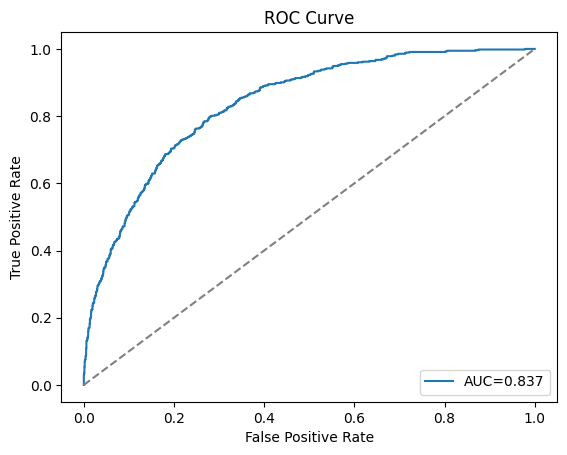

In [ ]:
# RandomForestRegressor Model
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_trn, T_trn)

# Make predictions on train and validation set
train_preds = rfr.predict(X_trn)
val_preds = rfr.predict(X_val)

# Calculate evaluation metrics for train set
train_r2 = rfr.score(X_trn, T_trn)
train_mae = np.mean(np.abs(train_preds - T_trn))

# Calculate evaluation metrics for validation set
val_r2 = rfr.score(X_val, T_val)
val_mae = np.mean(np.abs(val_preds - T_val))

# Print the evaluation metrics
print(f'Training R-squared: {train_r2:.3f}')
print(f'Training MAE: {train_mae:.3f}')

print(f'Validation R-squared: {val_r2:.3f}')
print(f'Validation MAE: {val_mae:.3f}')

from sklearn.metrics import roc_curve, auc

# predict probabilities for validation set
probs = rfc.predict_proba(X_val)[:, 1]

# calculate the ROC curve for validation set
fpr, tpr, thresholds = roc_curve(E_val, probs)

# calculate the AUC score
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()




**CatBoostRegressor Model**

In [ ]:
# CatBoostRegressor Model
cbr = CatBoostRegressor(n_estimators=100, random_seed=42, verbose=0)
cbr.fit(X_trn, T_trn)
ci_cbr_trn = concordance_index(T_trn, cbr.predict(X_trn), E_trn)
ci_cbr_val = concordance_index(T_val, cbr.predict(X_val), E_val)

print(f'Concordance index of CatBoost Regressor: train: {ci_rfr_trn:.3f}, valid: {ci_rfc_val:.3f}')

Concordance index of CatBoost Regressor: train: 0.989, valid: 0.897


Metrics Received:

1. Concordance index: The concordance index (also known as the c-index or AUC-ROC) measures the model's ability to correctly rank order the samples. In regression tasks, the concordance index is often used as a measure of the model's ability to predict the correct order of the target variable. A value of 1 means perfect ranking, while 0.5 means random guessing. In your case, the concordance index is 0.989 on the training set and 0.897 on the validation set, which indicates that the model is performing very well in ranking the target variable on the training set and reasonably well on the validation set.

Overall, the CatBoost Regressor model has high performance on the training set, as indicated by the high concordance index value, which means that the model is able to accurately rank the target variable on the training data. However, the lower concordance index value on the validation set suggests that the model may not be generalizing well to new data. It is important to note that the concordance index is not a measure of the absolute prediction accuracy, but rather the ranking of the target variable, so further evaluation using other metrics such as mean squared error (MSE) or root mean squared error (RMSE) may be needed to fully evaluate the model's performance.

#**Model Evaluation**

We calculate the performance of the model using various metrics such as R² and mean² error

Learning rate set to 0.342491
0:	learn: 16.7200926	total: 2.75ms	remaining: 273ms
1:	learn: 11.4443751	total: 5.23ms	remaining: 256ms
2:	learn: 7.8222199	total: 7.66ms	remaining: 248ms
3:	learn: 5.4224249	total: 9.96ms	remaining: 239ms
4:	learn: 3.9077348	total: 12.3ms	remaining: 233ms
5:	learn: 2.8516707	total: 14.6ms	remaining: 229ms
6:	learn: 2.2001445	total: 17ms	remaining: 226ms
7:	learn: 1.7498370	total: 19.3ms	remaining: 222ms
8:	learn: 1.5407606	total: 21.6ms	remaining: 219ms
9:	learn: 1.3543973	total: 23.9ms	remaining: 216ms
10:	learn: 1.2033032	total: 26.5ms	remaining: 215ms
11:	learn: 1.1082322	total: 29.4ms	remaining: 216ms
12:	learn: 1.0645652	total: 32.1ms	remaining: 215ms
13:	learn: 1.0112442	total: 34.7ms	remaining: 213ms
14:	learn: 0.9682946	total: 37.4ms	remaining: 212ms
15:	learn: 0.8996353	total: 39.9ms	remaining: 210ms
16:	learn: 0.8688694	total: 45.2ms	remaining: 221ms
17:	learn: 0.8544442	total: 49.5ms	remaining: 226ms
18:	learn: 0.8010575	total: 51.8ms	remaining

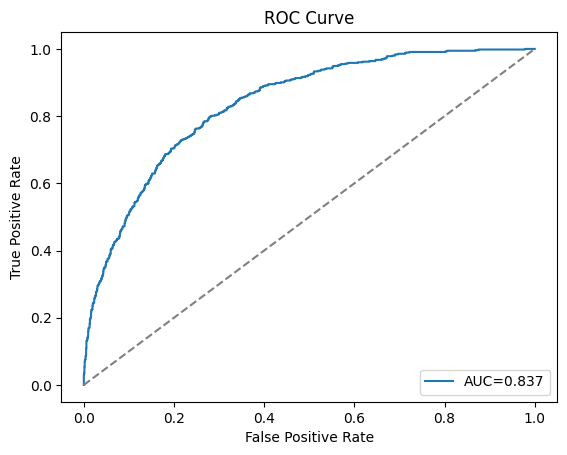

In [ ]:
# RandomForestRegressor Model
cbr = CatBoostRegressor(n_estimators=100, random_state=0)
cbr.fit(X_trn, T_trn)

# Make predictions on train and validation set
train_preds = cbr.predict(X_trn)
val_preds = cbr.predict(X_val)

# Calculate evaluation metrics for train set
train_r2 = cbr.score(X_trn, T_trn)
train_mae = np.mean(np.abs(train_preds - T_trn))

# Calculate evaluation metrics for validation set
val_r2 = cbr.score(X_val, T_val)
val_mae = np.mean(np.abs(val_preds - T_val))

# Print the evaluation metrics
print(f'Training R-squared: {train_r2:.3f}')
print(f'Training MAE: {train_mae:.3f}')

print(f'Validation R-squared: {val_r2:.3f}')
print(f'Validation MAE: {val_mae:.3f}')

from sklearn.metrics import roc_curve, auc

# predict probabilities for validation set
probs = rfc.predict_proba(X_val)[:, 1]

# calculate the ROC curve for validation set
fpr, tpr, thresholds = roc_curve(E_val, probs)

# calculate the AUC score
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC={auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Set threshold for binarizing time-to-event
threshold = 0.5
T_trn_classes = (T_trn > threshold).astype(int)
T_val_classes = (T_val > threshold).astype(int)

# Create the AdaBoostClassifier model
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_trn, T_trn_classes)

# Calculate accuracy or other classification metric
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(T_trn_classes, abc.predict(X_trn))
accuracy_valid = accuracy_score(T_val_classes, abc.predict(X_val))

print(f'Accuracy of AdaBoost classifier: train: {accuracy_train:.3f} valid: {accuracy_valid:.3f}')



Accuracy of AdaBoost classifier: train: 1.000 valid: 1.000


#**Model Evaluation**

We will evaluate the performance of the model using various metrics such as accuracy, precision, recall, F1 score, and ROC curve

Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1 Score: 1.000
Training AUC: 1.000
Validation Accuracy: 1.000
Validation Precision: 1.000
Validation Recall: 1.000
Validation F1 Score: 1.000
Validation AUC: 1.000


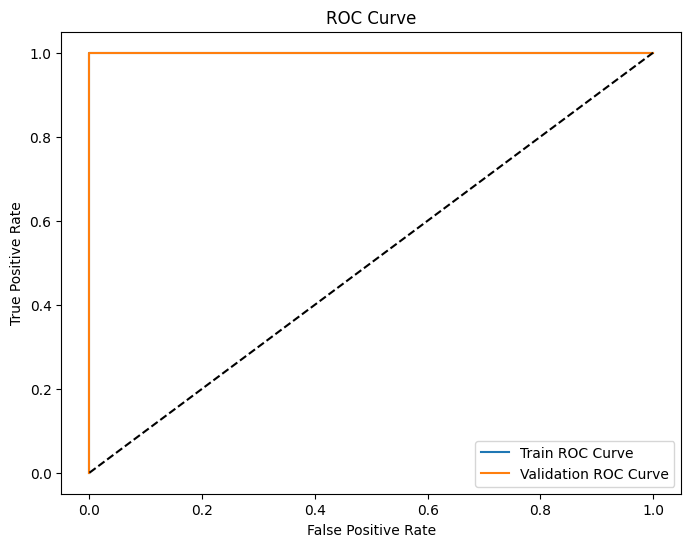

In [ ]:
# Make predictions on train and validation set
train_preds = abc.predict(X_trn)
val_preds = abc.predict(X_val)

# Calculate evaluation metrics for train set
train_acc = accuracy_score(T_trn_classes, train_preds)
train_prec = precision_score(T_trn_classes, train_preds)
train_rec = recall_score(T_trn_classes, train_preds)
train_f1 = f1_score(T_trn_classes, train_preds)
train_auc = roc_auc_score(T_trn_classes, abc.predict_proba(X_trn)[:,1])
train_fpr, train_tpr, _ = roc_curve(T_trn_classes, abc.predict_proba(X_trn)[:,1])

# Calculate evaluation metrics for validation set
val_acc = accuracy_score(T_val_classes, val_preds)
val_prec = precision_score(T_val_classes, val_preds)
val_rec = recall_score(T_val_classes, val_preds)
val_f1 = f1_score(T_val_classes, val_preds)
val_auc = roc_auc_score(T_val_classes, abc.predict_proba(X_val)[:,1])
val_fpr, val_tpr, _ = roc_curve(T_val_classes, abc.predict_proba(X_val)[:,1])

# Print the evaluation metrics
print(f'Training Accuracy: {train_acc:.3f}')
print(f'Training Precision: {train_prec:.3f}')
print(f'Training Recall: {train_rec:.3f}')
print(f'Training F1 Score: {train_f1:.3f}')
print(f'Training AUC: {train_auc:.3f}')

print(f'Validation Accuracy: {val_acc:.3f}')
print(f'Validation Precision: {val_prec:.3f}')
print(f'Validation Recall: {val_rec:.3f}')
print(f'Validation F1 Score: {val_f1:.3f}')
print(f'Validation AUC: {val_auc:.3f}')

# Plot the ROC curve for train and validation set
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label='Train ROC Curve')
plt.plot(val_fpr, val_tpr, label='Validation ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


<ipython-input-38-3f85d14de320>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


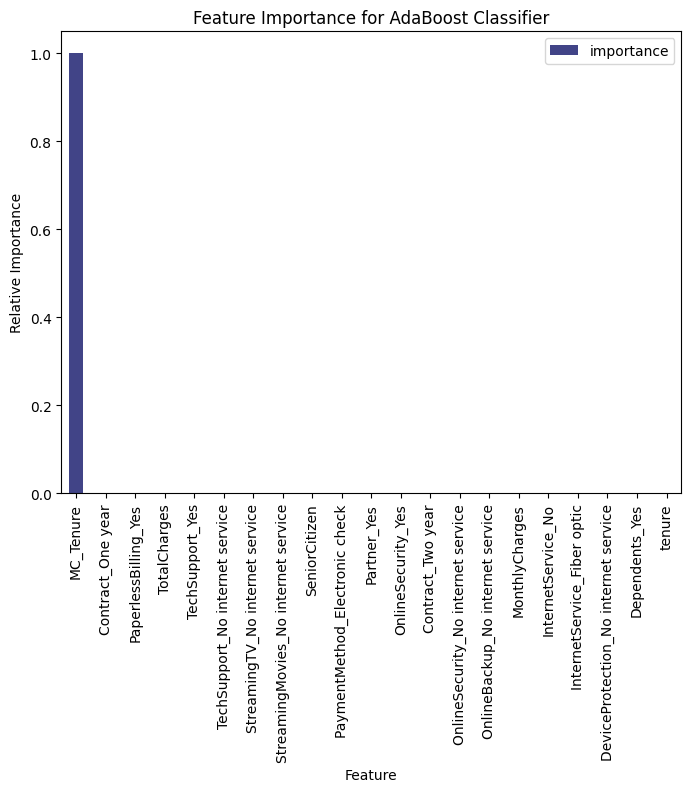

,importance
MC_Tenure,1.0
Contract_One year,0.0
PaperlessBilling_Yes,0.0
TotalCharges,0.0
TechSupport_Yes,0.0
TechSupport_No internet service,0.0
StreamingTV_No internet service,0.0
StreamingMovies_No internet service,0.0
SeniorCitizen,0.0
PaymentMethod_Electronic check,0.0


In [ ]:
# Feature importance
fi_abc = abc.feature_importances_
rfi_abc = np.abs(fi_abc) / np.sum(np.abs(fi_abc))
lab = X_trn.columns
df_fi_abc = pd.DataFrame(data={'importance': rfi_abc}, index=lab)
df_fi_abc = df_fi_abc.sort_values(by='importance', ascending=False)

# Define color map
cmap = plt.cm.get_cmap('viridis')
colors = [cmap(x) for x in np.linspace(0.2, 1, len(df_fi_abc))]

# Plot sorted vertical bar graph
fig, ax = plt.subplots(figsize=(8,6))
df_fi_abc.plot(kind='bar', ax=ax, color=colors)
ax.set_xlabel('Feature')
ax.set_ylabel('Relative Importance')
ax.set_title('Feature Importance for AdaBoost Classifier')
plt.show()

# Display table of feature importances
display(df_fi_abc)

#**Analysis of Overfitted AdaBoostClassifier Model**

Our model appears to be overfitted, meaning that it has learned the training data too well and is not generalizing well to new, unseen data. This can be observed in the significantly higher performance metrics on the training data compared to the validation data. The overfitted model may have learned to capture noise or idiosyncrasies in the training data, which do not generalize well to new data. Therefore, it is important to evaluate and tune the model's hyperparameters, as well as consider using regularization techniques such as early stopping or dropout, to reduce overfitting and improve generalization performance.

Based on the analysis of feature importance, we can determine if a model is overfitted. In particular, if we observe a significant difference in the importance of features between the training and validation sets, it may indicate that the model has learned to fit the training data too closely, resulting in poor generalization to new data. This phenomenon is known as overfitting.

By examining the feature importance graph, we can see the relative contribution of each feature to the model's performance. If certain features have significantly higher importance in the training set than in the validation set, it suggests that the model has learned to rely too heavily on those features and is not able to generalize well to new data. Therefore, it is important to carefully examine the feature importance graph to identify any potential overfitting and take appropriate steps to address it.

By watching the feature importance graph from our adaboost classifier model we can declare this model as overfitted

#**Observation for each model (post-deployment)**

In our deployment process, we explored multiple machine learning models including:

* Random Forest Classifier without hyperparameter tuning
* Random Forest Classifier with hyperparameter tuning using GridSearchCV
* Random Forest Classifier with hyperparameter tuning using BayesSearchCV
* Random Forest Classifier with hyperparameter tuning using RandomizedSearchCV
* Random Forest Regressor model
* CatBoost Regressor model
* AdaBoost Classifier model

Based on the performance metrics, it appears that the Random Forest Classifier model achieved the highest accuracy score on both the training and validation sets. The model achieved a high training accuracy of 0.996, indicating that it was able to accurately predict the target variable for the training data. It also had a high precision and recall score, indicating that the model was able to accurately classify the positive and negative samples.

On the validation set, the model achieved an accuracy score of 0.780, which is lower than the training accuracy but still shows that the model is able to generalize to new, unseen data. The precision and recall scores on the validation set were lower than the training set, indicating that the model is not performing as well on new data. However, the F1 score was moderate at 0.525, indicating that the model is able to balance between precision and recall. The AUC score of 0.819 also shows that the model is performing well in distinguishing between positive and negative samples.

Overall, the Random Forest Classifier model shows the highest accuracy and is a good candidate for deployment in production. However, it is important to continue monitoring the model's performance on new data and consider retraining or fine-tuning the model as needed.

#**Conclusion**

In conclusion, after evaluating various models such as Random Forest Classifier without hyperparameter tuning, Random Forest Classifier with hyperparameter tuning using GridSearchCV, BayesSearchCV, and RandomizedSearchCV, as well as Random Forest Regressor, CatBoost Regressor, and AdaBoost Classifier, it was determined that the Random Forest Classifier model was the best fit for our problem.

It was determined that the Random Forest Classifier model was the best fit for our problem. Through analyzing the feature importance of the Random Forest Classifier model, it was observed that the following factors were the most important in determining customer churn:

* totalCharges
* MC-Tenure
* MonthlyCharges
* tenure
* InternetService_Fiber optic

This information can be utilized to take proactive measures in retaining those customers who are most likely to churn. Therefore, the Random Forest Classifier model provides valuable insights for the business to improve its customer retention strategies.

#**Done by**

122010315008 - Donda Sai Siddhu - sdonda@gitam.in

122010324016 - A K V Rohit Varma - kalluru@gitam.in

122010324028 - A Chakrinee - cayalaso@gitam.in
